In [52]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import timedelta
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

In [53]:
df_smart=pd.read_csv("D:/SmartRecruiters_Applicant_Data.csv")
df_people=pd.read_csv("D:/PeopleSoft_Employee_Data.csv")
df_position=pd.read_csv("D:/Position_Control_System.csv")

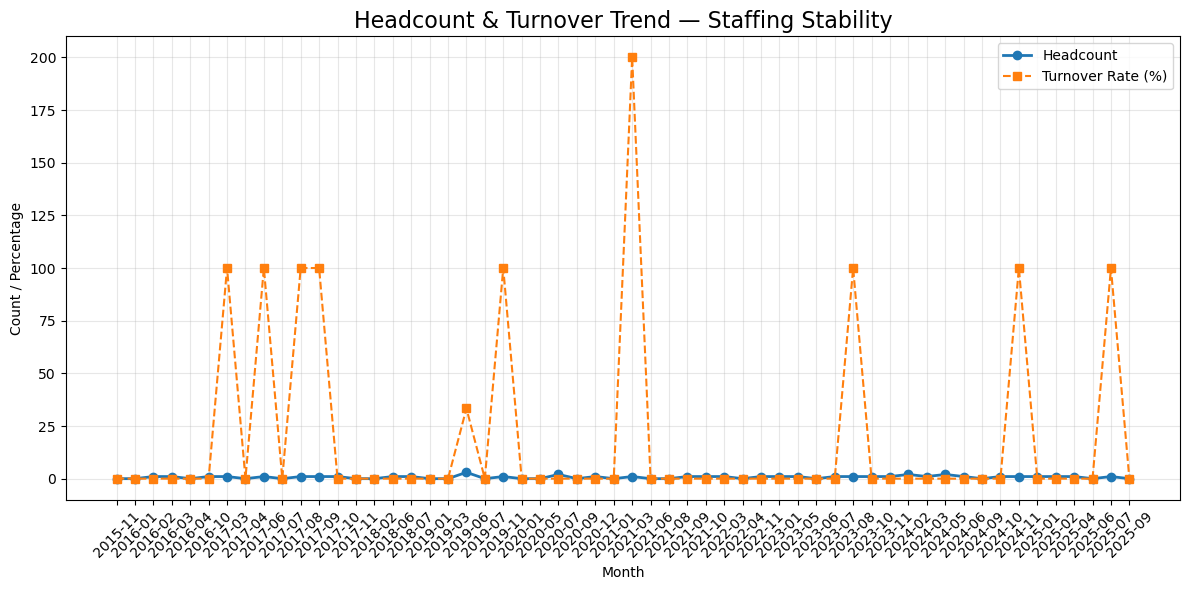

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load and prepare data
# ----------------------------
df = pd.read_csv("D:/PeopleSoft_Employee_Data.csv")

# Ensure date column is in datetime format
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')

# Create a year-month column for grouping
df['year_month'] = df['hire_date'].dt.to_period('M')

# ----------------------------
# 2. Calculate Headcount and Turnover
# ----------------------------

# Headcount per month (active employees)
headcount = df[df['employment_status'] == 'Active'].groupby('year_month').size()

# Terminations per month
terminated = df[df['employment_status'] == 'Terminated'].groupby('year_month').size()

# Combine into one DataFrame
df_trends = pd.DataFrame({
    'Headcount': headcount,
    'Terminations': terminated
}).fillna(0)

# Compute turnover rate safely (avoid division by zero or NAType issues)
df_trends['Turnover Rate (%)'] = (
    df_trends['Terminations'] / df_trends['Headcount'].replace(0, np.nan)
) * 100

df_trends = df_trends.fillna(0)  # replace NaNs after calculation

# ----------------------------
# 3. Visualization
# ----------------------------
plt.figure(figsize=(12, 6))

# Plot Headcount trend
plt.plot(df_trends.index.astype(str), df_trends['Headcount'], label='Headcount', marker='o', linewidth=2)

# Plot Turnover Rate trend
plt.plot(df_trends.index.astype(str), df_trends['Turnover Rate (%)'], label='Turnover Rate (%)', marker='s', linestyle='--')

plt.title("Headcount & Turnover Trend — Staffing Stability", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Count / Percentage")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
df_people.columns

Index(['employee_id', 'first_name', 'last_name', 'department', 'job_title',
       'hire_date', 'employment_status', 'position_id', 'salary',
       'supervisor_id'],
      dtype='object')

In [56]:
import pandas as pd
import random

# Load PeopleSoft dataset
df_people = pd.read_csv("D:/PeopleSoft_Employee_Data.csv")

# Possible values
genders = ["Male", "Female", "Non-Binary"]
races = ["White", "Black", "Hispanic", "Asian", "Other"]
job_levels = ["Junior", "Mid", "Senior", "Manager"]

# Create DEI data
dei_data = []
for idx, row in df_people.iterrows():
    dei_data.append({
        "employee_id": row["employee_id"],
        "gender": random.choice(genders),
        "race_ethnicity": random.choice(races),
        "salary": row["salary"] * random.uniform(0.95, 1.05),  # slight variation
        "job_level": random.choice(job_levels)
    })

df_dei = pd.DataFrame(dei_data)

# Save DEI CSV
df_dei.to_csv("d:/DEI_Data.csv", index=False)
print("✅ DEI dataset created: DEI_Data.csv")

# Merge with PeopleSoft
df_merged = df_people.merge(df_dei, on="employee_id")
df_merged.to_csv("d:/PeopleSoft_with_DEI.csv", index=False)
print("✅ Merged dataset created: PeopleSoft_with_DEI.csv")

✅ DEI dataset created: DEI_Data.csv
✅ Merged dataset created: PeopleSoft_with_DEI.csv


In [57]:
df_merged.columns

Index(['employee_id', 'first_name', 'last_name', 'department', 'job_title',
       'hire_date', 'employment_status', 'position_id', 'salary_x',
       'supervisor_id', 'gender', 'race_ethnicity', 'salary_y', 'job_level'],
      dtype='object')

In [58]:
import pandas as pd

df = pd.read_csv("D:/PeopleSoft_with_DEI.csv")

# Rename merged salary column for DEI analysis
df = df.rename(columns={'salary_y': 'salary'})

# Optional: drop the old PeopleSoft salary if not needed
df = df.drop(columns=['salary_x'])

In [59]:
import pandas as pd

df = pd.read_csv("d:/PeopleSoft_with_DEI.csv")


In [60]:
# Rename merged salary column for DEI analysis
df = df.rename(columns={'salary_y': 'salary'})

# Optional: drop the old PeopleSoft salary if not needed
df = df.drop(columns=['salary_x'])

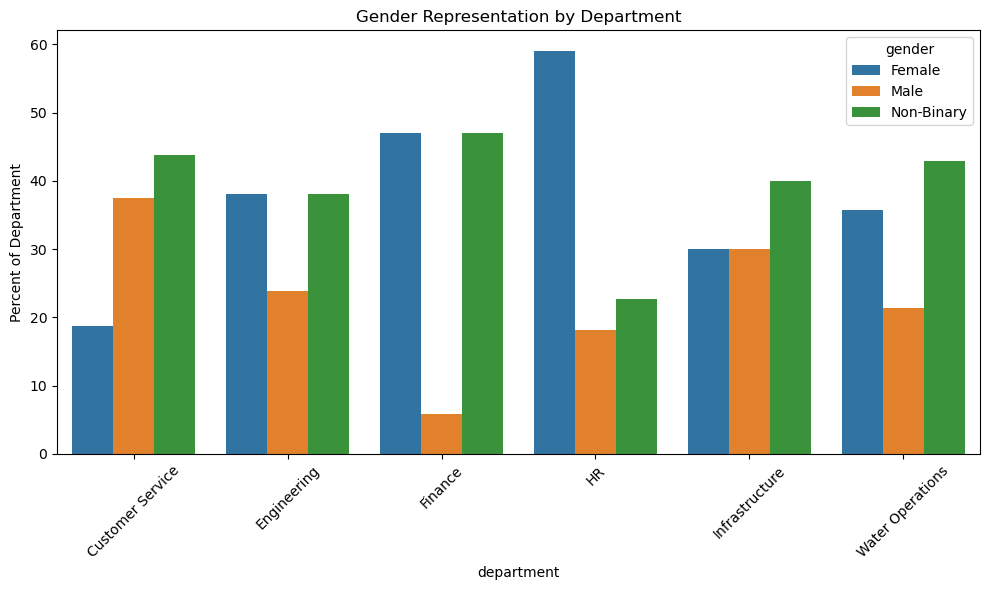

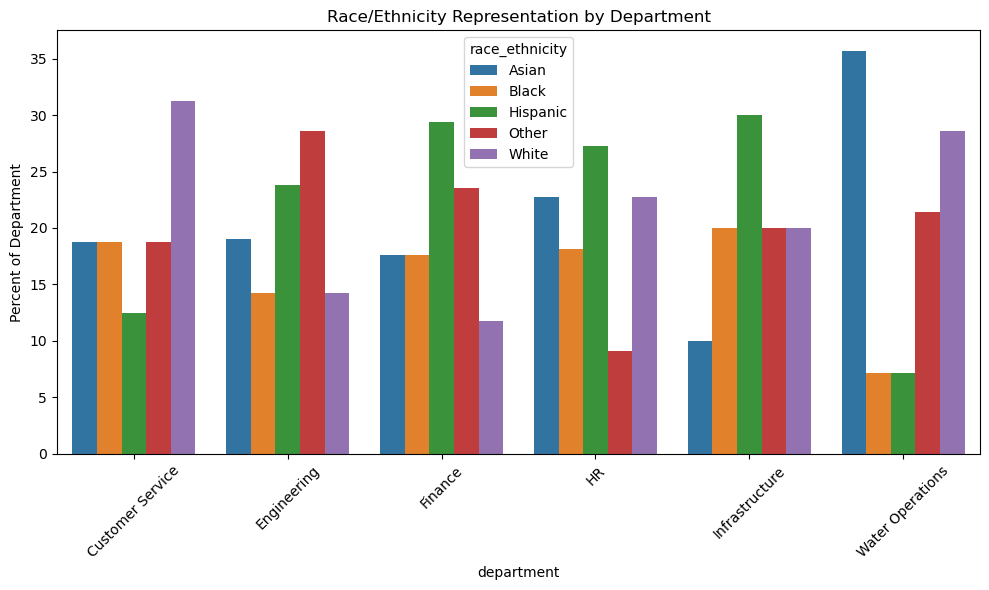

In [61]:
# Ensure date is datetime
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')

# ----------------------------
# 2. Gender Representation by Department
# ----------------------------
repr_gender = (
    df.groupby(['department', 'gender'])
    .size()
    .reset_index(name='count')
)
totals = repr_gender.groupby('department')['count'].transform('sum')
repr_gender['pct'] = (repr_gender['count'] / totals) * 100

plt.figure(figsize=(10,6))
sns.barplot(data=repr_gender, x='department', y='pct', hue='gender')
plt.title('Gender Representation by Department')
plt.ylabel('Percent of Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Race/Ethnicity Representation by Department
# ----------------------------
repr_race = (
    df.groupby(['department', 'race_ethnicity'])
    .size()
    .reset_index(name='count')
)
totals = repr_race.groupby('department')['count'].transform('sum')
repr_race['pct'] = (repr_race['count'] / totals) * 100

plt.figure(figsize=(10,6))
sns.barplot(data=repr_race, x='department', y='pct', hue='race_ethnicity')
plt.title('Race/Ethnicity Representation by Department')
plt.ylabel('Percent of Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



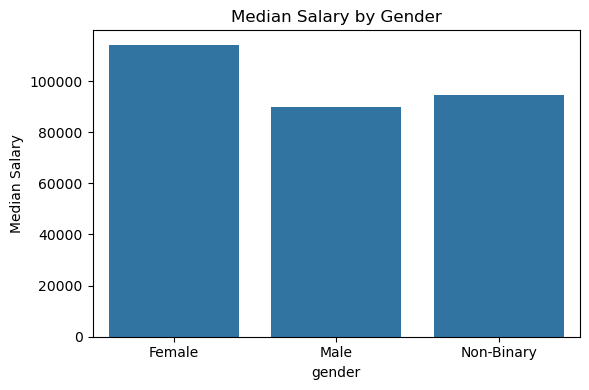

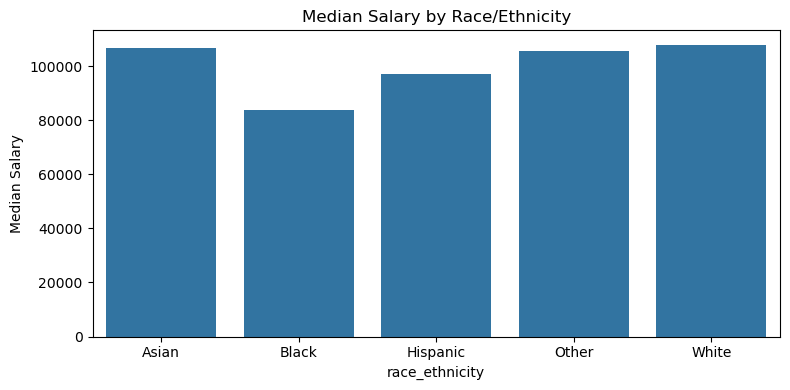

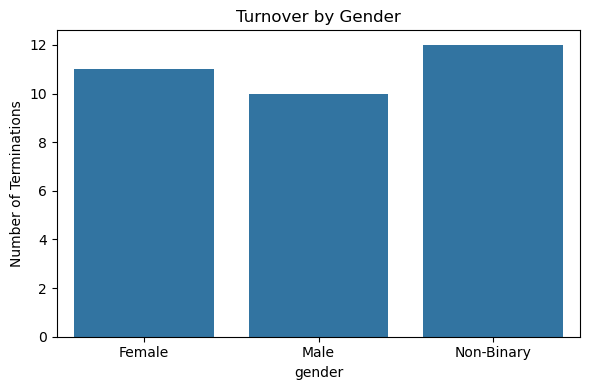

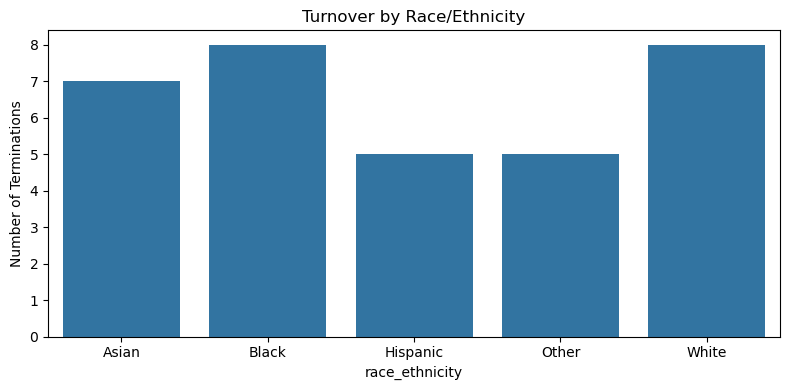

In [62]:
# ----------------------------
# 4. Median Salary by Gender
# ----------------------------
salary_gender = df.groupby('gender')['salary'].median().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=salary_gender, x='gender', y='salary')
plt.title('Median Salary by Gender')
plt.ylabel('Median Salary')
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Median Salary by Race/Ethnicity
# ----------------------------
salary_race = df.groupby('race_ethnicity')['salary'].median().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=salary_race, x='race_ethnicity', y='salary')
plt.title('Median Salary by Race/Ethnicity')
plt.ylabel('Median Salary')
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Turnover by Gender
# ----------------------------
turnover_gender = (
    df[df['employment_status'] == 'Terminated']
    .groupby('gender')
    .size()
    .reset_index(name='terminations')
)

plt.figure(figsize=(6,4))
sns.barplot(data=turnover_gender, x='gender', y='terminations')
plt.title('Turnover by Gender')
plt.ylabel('Number of Terminations')
plt.tight_layout()
plt.show()

# ----------------------------
# 7. Turnover by Race/Ethnicity
# ----------------------------
turnover_race = (
    df[df['employment_status'] == 'Terminated']
    .groupby('race_ethnicity')
    .size()
    .reset_index(name='terminations')
)

plt.figure(figsize=(8,4))
sns.barplot(data=turnover_race, x='race_ethnicity', y='terminations')
plt.title('Turnover by Race/Ethnicity')
plt.ylabel('Number of Terminations')
plt.tight_layout()
plt.show()